# EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
data = pd.read_csv('clean_data.csv')

In [16]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7015 entries, 0 to 7014
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               7015 non-null   object 
 1   gender                   7015 non-null   int64  
 2   SeniorCitizen            7015 non-null   int64  
 3   Partner                  7015 non-null   int64  
 4   Dependents               7015 non-null   int64  
 5   tenure                   7015 non-null   int64  
 6   PhoneService             7015 non-null   int64  
 7   MultipleLines            7015 non-null   int64  
 8   IntrntSrvc_DSL           7015 non-null   bool   
 9   IntrntSrvc_FiberOptic    7015 non-null   bool   
 10  IntrntSrvc_No            7015 non-null   bool   
 11  OnlineSecurity           7015 non-null   int64  
 12  OnlineBackup             7015 non-null   int64  
 13  DeviceProtection         7015 non-null   int64  
 14  TechSupport             

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,IntrntSrvc_DSL,IntrntSrvc_FiberOptic,...,Contract_OneYear,Contract_TwoYear,PaperlessBilling,PayMthd_BankTransfer,PayMthd_CreditCard,PayMthd_ElectronicCheck,PayMthd_MailedCheck,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,True,False,...,False,False,1,False,False,True,False,29.84,29.84,0
1,5575-GNVDE,1,0,0,0,34,1,0,True,False,...,True,False,0,False,False,False,True,56.94,1890.00,0
2,3668-QPYBK,1,0,0,0,2,1,0,True,False,...,False,False,1,False,False,False,True,53.84,108.10,1
3,7795-CFOCW,1,0,0,0,45,0,0,True,False,...,True,False,0,True,False,False,False,42.30,1841.00,0
4,9237-HQITU,0,0,0,0,2,1,0,False,True,...,False,False,1,False,False,True,False,70.70,151.60,1


# Pair plot of some crucial features

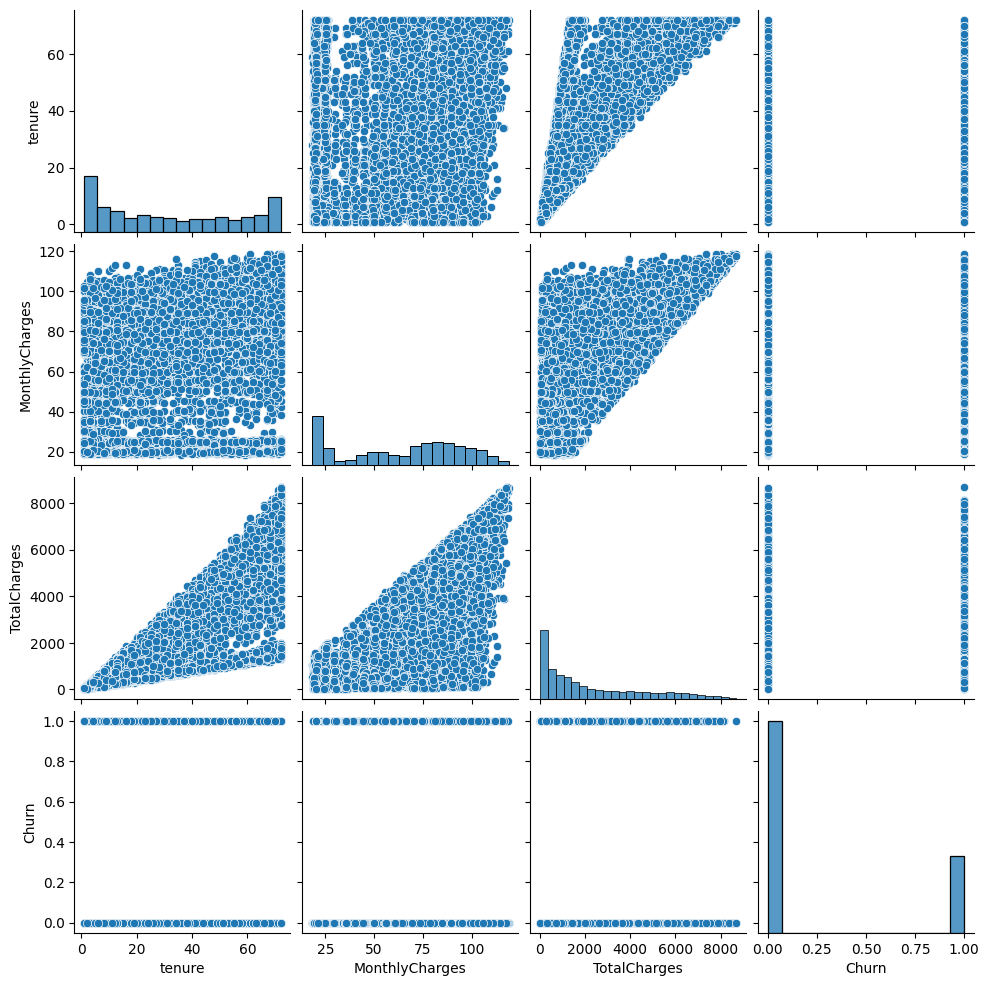

In [17]:
# Create a pair plot
columns = ['tenure','MonthlyCharges','TotalCharges','Churn']
sns.pairplot(data[columns])
plt.show()

##### The pair plot of seemingly important features of the data to idnetify initial trends among data for churn prediction.

## Churn value Pie chart

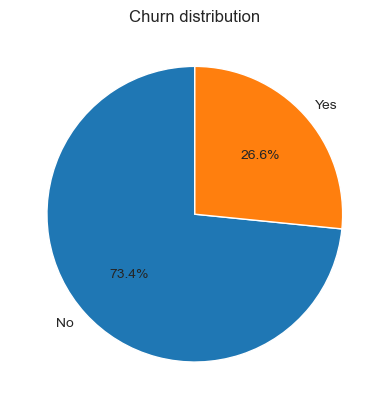

In [129]:
churn_cnt = data['Churn'].value_counts()

#Pie Chart
plt.pie(churn_cnt, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
plt.title('Churn distribution')
plt.show()

##### The churn data shows 26.6% of customers as churned while rest 73.4% of the customers stayed with the company. It can be induced from this pie chart that more than quarter of the customers has left. 

# Churn distribution based on gender

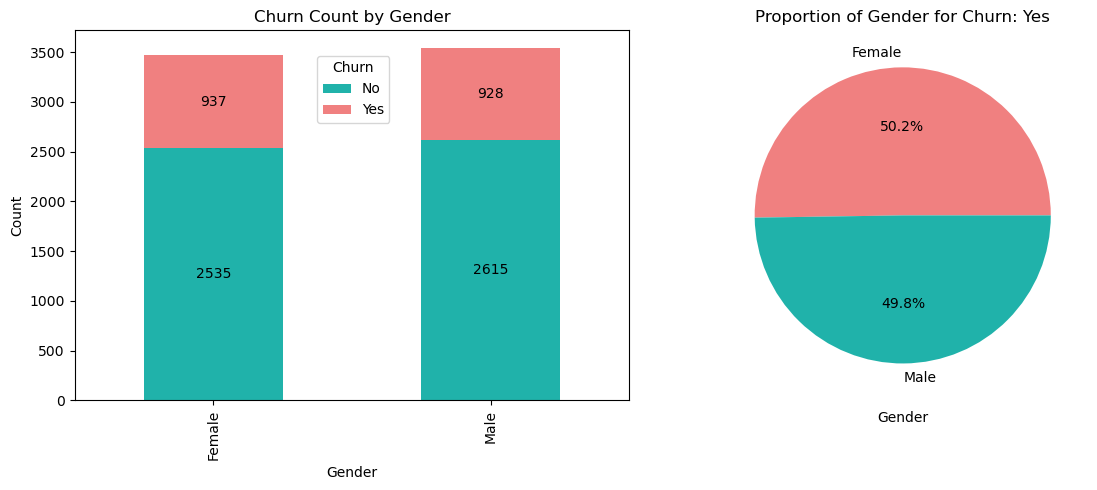

In [26]:
# Map gender and churn values to more descriptive labels
column = 'gender'
alias = 'Gender'
plot_data = {alias: data[column].map({0: 'Female', 1: 'Male'}),
             'Churn': data['Churn'].map({0: 'No', 1: 'Yes'})}
plot_df = pd.DataFrame(plot_data)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Stacked Bar Graph
ct = pd.crosstab(plot_df[alias], plot_df['Churn'])
ax = ct.plot(kind='bar', stacked=True, color=['lightseagreen', 'lightcoral'], ax=axes[0])
ax.set_title('Churn Count by ' + alias)
ax.set_xlabel(alias)
ax.set_ylabel('Count')
ax.legend(title='Churn', loc='upper right', bbox_to_anchor=(0.58, 0.95))
# Add counts inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontsize=10, color='black')

# Pie Chart
churn_1_data = plot_df[plot_df['Churn'] == 'Yes']
churn_1_data[alias].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightseagreen'], ax=axes[1])
axes[1].set_title('Proportion of ' +alias+ ' for Churn: Yes')
axes[1].set_xlabel(alias)
axes[1].set_ylabel('')

# Plotting
plt.tight_layout()
plt.show()            

#### No particular trend observed based on gender for churn prediction. Both the genders are equally likely to churn.

# Chrun distribution by Senior Citizens

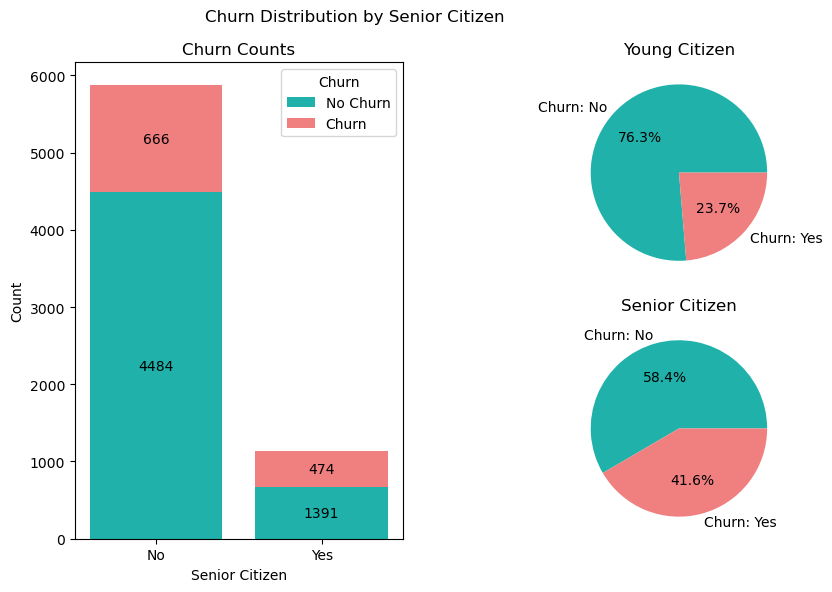

In [28]:
plot_data = {'Senior Citizen': data['SeniorCitizen'].map({0: 'No', 1: 'Yes'}),
             'Churn': data['Churn'].map({0: 'No', 1: 'Yes'})}
plot_df = pd.DataFrame(plot_data)

# Create crosstab for counts
ct = pd.crosstab(plot_df['Senior Citizen'], plot_df['Churn'])

# Create a custom layout using gridspec
fig = plt.figure(figsize=(12, 6))
# gs = gridspec.GridSpec(1, 3, width_ratios=[3, 2, 2])
gs = gridspec.GridSpec(2, 4, width_ratios=[2, 1, 1, 1])


# Barplot: All citizens vs Churn
ax0 = plt.subplot(gs[:, 0])
ax0.bar(ct.index, ct['No'], label='No Churn', color='lightseagreen')
ax0.bar(ct.index, ct['Yes'], bottom=ct['No'], label='Churn', color='lightcoral')
ax0.set_title('Churn Counts')
ax0.set_xlabel('Senior Citizen')
ax0.set_ylabel('Count')
ax0.set_xticks(range(len(ct.index)))
ax0.set_xticklabels(ct.index, rotation=0)
ax0.legend(title='Churn')
# Add counts inside the bars
for p, count in zip(ax0.patches, ct.values.flatten()):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax0.text(x + width / 2, y + height / 2, f'{int(count)}', ha='center', va='center', fontsize=10, color='black')


# Piechart: Young Citizen
ax1 = plt.subplot(gs[0, 1:])
ax1.pie(ct.loc['No'], labels=['Churn: No', 'Churn: Yes'], autopct='%1.1f%%', colors=['lightseagreen', 'lightcoral'])
ax1.set_title('Young Citizen')

# Piechart: Senior Citizen
ax2 = plt.subplot(gs[1, 1:])
ax2.pie(ct.loc['Yes'], labels=['Churn: No', 'Churn: Yes'], autopct='%1.1f%%', colors=['lightseagreen', 'lightcoral'])
ax2.set_title('Senior Citizen')

plt.suptitle('Churn Distribution by Senior Citizen')
plt.tight_layout(rect=[0.2, 0, 1, 1])  # Adjust the layout to prevent clipping of the suptitle
plt.show()


#### The bar plot unmistakably illustrates that young people, as opposed to senior citizens, have a higher contribution to churn in terms of count. However, when we examine each category individually, the pie charts reveal a distinct pattern. Approximately 42% of senior citizens left, which is nearly double the percentage of young citizens who left (Senior Citizens = No).

# Chrun distribution by Dependent

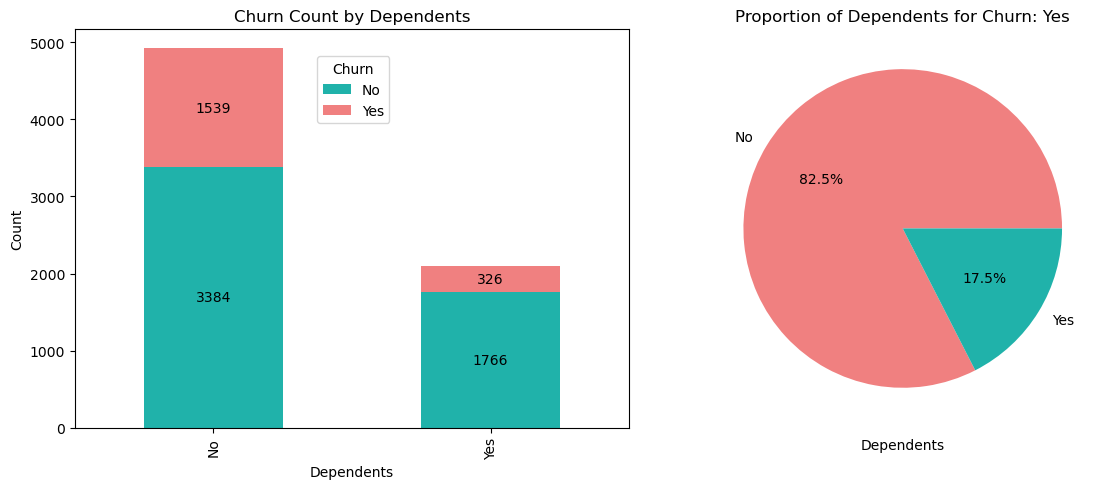

In [14]:
# Map Dependents and Churn values to more descriptive labels
column = 'Dependents'
alias = 'Dependents'
plot_data = {alias: data[column].map({0: 'No', 1: 'Yes'}),
             'Churn': data['Churn'].map({0: 'No', 1: 'Yes'})}
plot_df = pd.DataFrame(plot_data)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Stacked Bar Graph
ct = pd.crosstab(plot_df[alias], plot_df['Churn'])
ax = ct.plot(kind='bar', stacked=True, color=['lightseagreen', 'lightcoral'], ax=axes[0])
ax.set_title('Churn Count by ' + alias)
ax.set_xlabel(alias)
ax.set_ylabel('Count')
ax.legend(title='Churn', loc='upper right', bbox_to_anchor=(0.58, 0.95))
# Add counts inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontsize=10, color='black')

# Pie Chart
churn_1_data = plot_df[plot_df['Churn'] == 'Yes']
churn_1_data[alias].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightseagreen'], ax=axes[1])
axes[1].set_title('Proportion of ' +alias+ ' for Churn: Yes')
axes[1].set_xlabel(alias)
axes[1].set_ylabel('')

# Plotting
plt.tight_layout()
plt.show()

#### Majority of the customers do not have dependents & customers who do not have dependents appear more likely to churn compared to those who have dependents.

# Chrun distribution by Partner

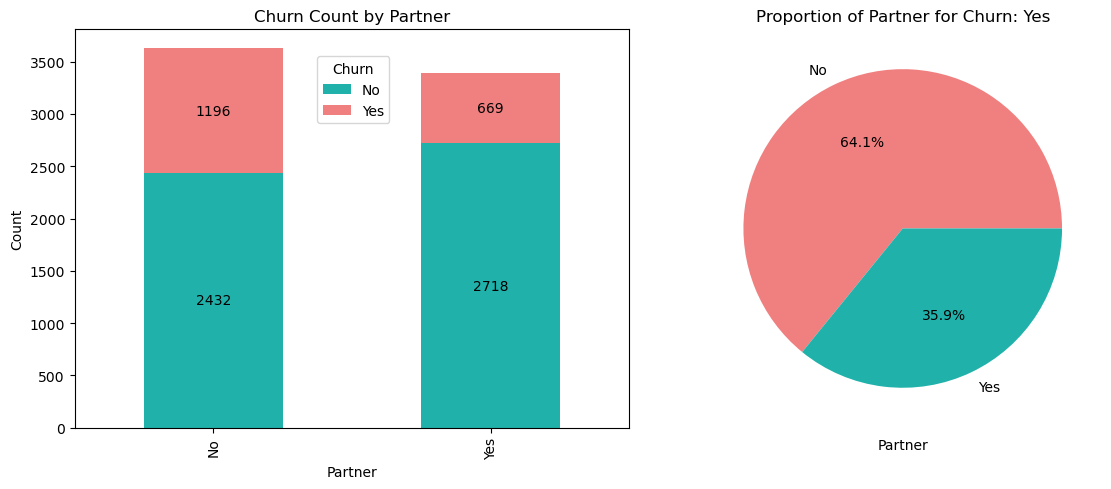

In [15]:
column = 'Partner'
alias = 'Partner'
plot_data = {alias: data[column].map({0: 'No', 1: 'Yes'}),
             'Churn': data['Churn'].map({0: 'No', 1: 'Yes'})}
plot_df = pd.DataFrame(plot_data)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Stacked Bar Graph
ct = pd.crosstab(plot_df[alias], plot_df['Churn'])
ax = ct.plot(kind='bar', stacked=True, color=['lightseagreen', 'lightcoral'], ax=axes[0])
ax.set_title('Churn Count by ' + alias)
ax.set_xlabel(alias)
ax.set_ylabel('Count')
ax.legend(title='Churn', loc='upper right', bbox_to_anchor=(0.58, 0.95))
# Add counts inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontsize=10, color='black')

# Pie Chart
churn_1_data = plot_df[plot_df['Churn'] == 'Yes']
churn_1_data[alias].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightseagreen'], ax=axes[1])
axes[1].set_title('Proportion of ' +alias+ ' for Churn: Yes')
axes[1].set_xlabel(alias)
axes[1].set_ylabel('')

# Plotting
plt.tight_layout()
plt.show()

#### Customers who do not have partners (single) appear to contribute more towards the churn.

## **Insights from Demographic Analysis**

We discovered that gender and relationship status are pretty evenly distributed within the client base, with approximate percentage values, based on our demographic study. While females have a somewhat greater turnover rate, this difference is modest and may not be statistically significant.

When we dive further into the demographics, though, a noteworthy tendency emerges. Younger consumers, those without partners, and those without dependents have a greater rate of turnover. Based on our data study, these specific categories of the consumer population stand out as being more prone to churn.

Our findings, in particular, highlight the importance of non-senior citizens without partners or dependents as a separate client niche worthy of consideration when developing customer retention tactics.

# Chrun distribution by PhoneService

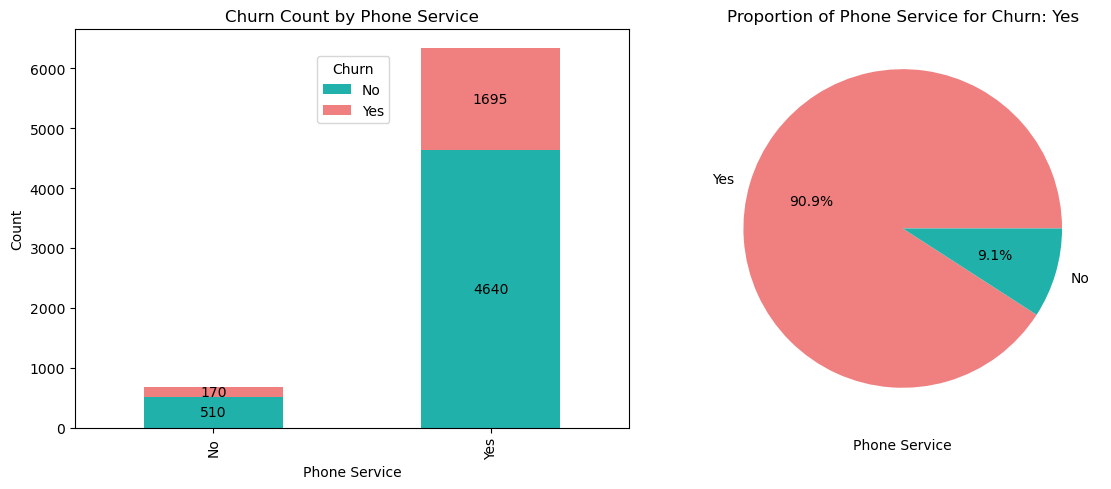

In [16]:
column = 'PhoneService'
alias = 'Phone Service'
plot_data = {alias: data[column].map({0: 'No', 1: 'Yes'}),
             'Churn': data['Churn'].map({0: 'No', 1: 'Yes'})}
plot_df = pd.DataFrame(plot_data)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Stacked Bar Graph
ct = pd.crosstab(plot_df[alias], plot_df['Churn'])
ax = ct.plot(kind='bar', stacked=True, color=['lightseagreen', 'lightcoral'], ax=axes[0])
ax.set_title('Churn Count by ' + alias)
ax.set_xlabel(alias)
ax.set_ylabel('Count')
ax.legend(title='Churn', loc='upper right', bbox_to_anchor=(0.58, 0.95))
# Add counts inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontsize=10, color='black')

# Pie Chart
churn_1_data = plot_df[plot_df['Churn'] == 'Yes']
churn_1_data[alias].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightseagreen'], ax=axes[1])
axes[1].set_title('Proportion of ' +alias+ ' for Churn: Yes')
axes[1].set_xlabel(alias)
axes[1].set_ylabel('')

# Plotting
plt.tight_layout()
plt.show()

#### More than 90% of the customers have phone service.

# Chrun distribution by MultipleLines

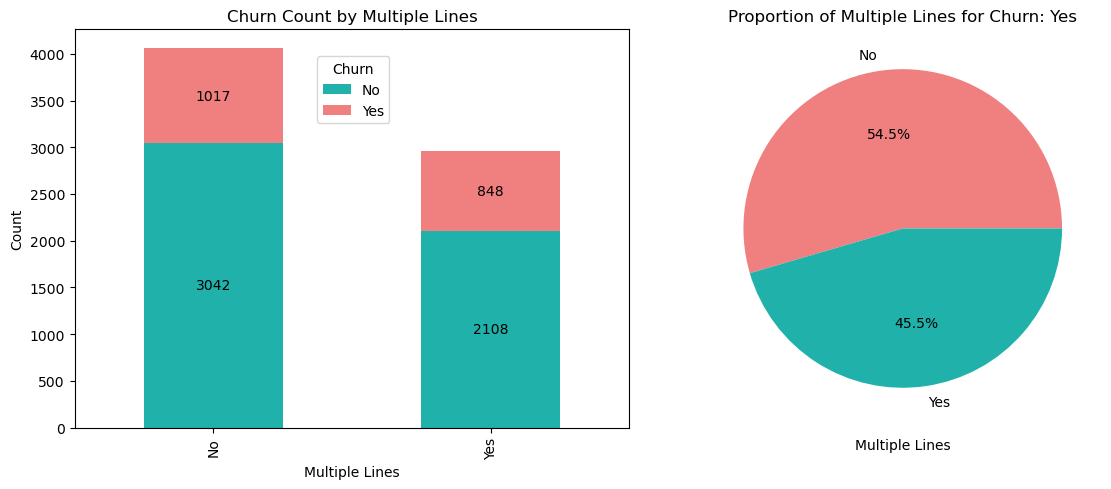

In [17]:
column = 'MultipleLines'
alias = 'Multiple Lines'
plot_data = {alias: data[column].map({0: 'No', 1: 'Yes'}),
             'Churn': data['Churn'].map({0: 'No', 1: 'Yes'})}
plot_df = pd.DataFrame(plot_data)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Stacked Bar Graph
ct = pd.crosstab(plot_df[alias], plot_df['Churn'])
ax = ct.plot(kind='bar', stacked=True, color=['lightseagreen', 'lightcoral'], ax=axes[0])
ax.set_title('Churn Count by ' + alias)
ax.set_xlabel(alias)
ax.set_ylabel('Count')
ax.legend(title='Churn', loc='upper right', bbox_to_anchor=(0.58, 0.95))
# Add counts inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontsize=10, color='black')

# Pie Chart
churn_1_data = plot_df[plot_df['Churn'] == 'Yes']
churn_1_data[alias].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightseagreen'], ax=axes[1])
axes[1].set_title('Proportion of ' +alias+ ' for Churn: Yes')
axes[1].set_xlabel(alias)
axes[1].set_ylabel('')

# Plotting
plt.tight_layout()
plt.show()

#### Customers who do not have multiple lines are more likely to be retained than those who have multiple lines.

# Chrun distribution by OnlineSecurity

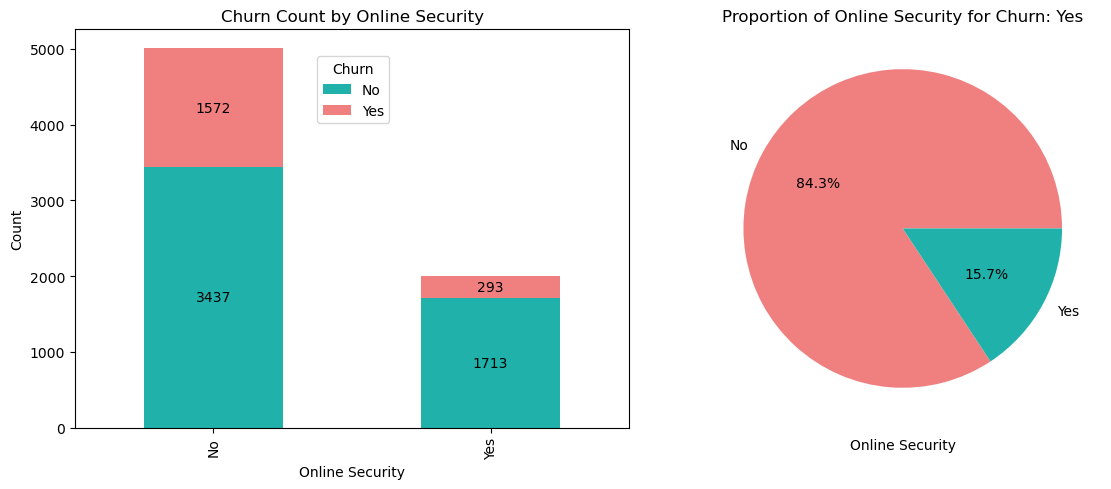

In [18]:
column = 'OnlineSecurity'
alias = 'Online Security'
plot_data = {alias: data[column].map({0: 'No', 1: 'Yes'}),
             'Churn': data['Churn'].map({0: 'No', 1: 'Yes'})}
plot_df = pd.DataFrame(plot_data)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Stacked Bar Graph
ct = pd.crosstab(plot_df[alias], plot_df['Churn'])
ax = ct.plot(kind='bar', stacked=True, color=['lightseagreen', 'lightcoral'], ax=axes[0])
ax.set_title('Churn Count by ' + alias)
ax.set_xlabel(alias)
ax.set_ylabel('Count')
ax.legend(title='Churn', loc='upper right', bbox_to_anchor=(0.58, 0.95))
# Add counts inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontsize=10, color='black')

# Pie Chart
churn_1_data = plot_df[plot_df['Churn'] == 'Yes']
churn_1_data[alias].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightseagreen'], ax=axes[1])
axes[1].set_title('Proportion of ' +alias+ ' for Churn: Yes')
axes[1].set_xlabel(alias)
axes[1].set_ylabel('')

# Plotting
plt.tight_layout()
plt.show()

#### Roughly 5 out of 7 customers do not have online security and these customers have higher chances of churning compared to those who have online security.

# Chrun distribution by OnlineBackup

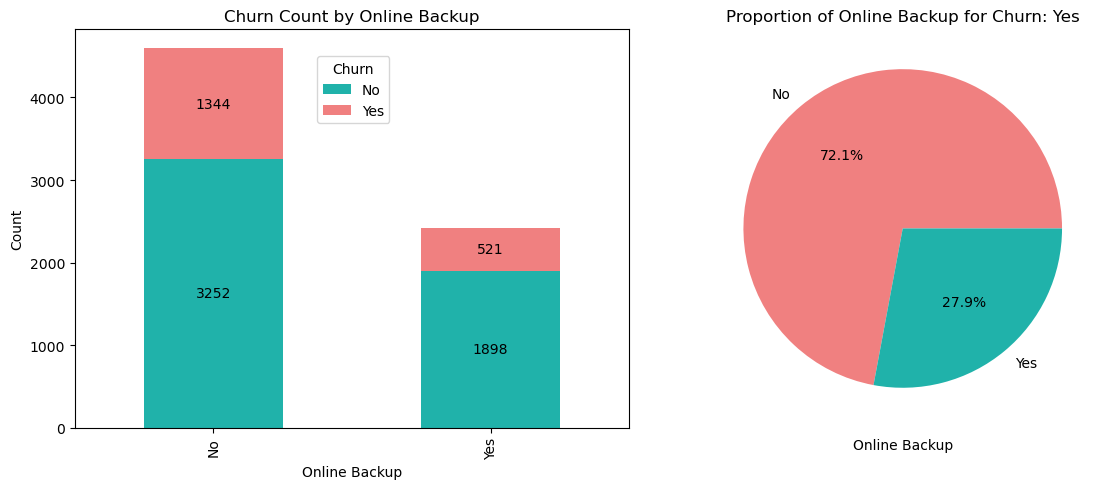

In [19]:
column = 'OnlineBackup'
alias = 'Online Backup'
plot_data = {alias: data[column].map({0: 'No', 1: 'Yes'}),
             'Churn': data['Churn'].map({0: 'No', 1: 'Yes'})}
plot_df = pd.DataFrame(plot_data)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Stacked Bar Graph
ct = pd.crosstab(plot_df[alias], plot_df['Churn'])
ax = ct.plot(kind='bar', stacked=True, color=['lightseagreen', 'lightcoral'], ax=axes[0])
ax.set_title('Churn Count by ' + alias)
ax.set_xlabel(alias)
ax.set_ylabel('Count')
ax.legend(title='Churn', loc='upper right', bbox_to_anchor=(0.58, 0.95))
# Add counts inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontsize=10, color='black')

# Pie Chart
churn_1_data = plot_df[plot_df['Churn'] == 'Yes']
churn_1_data[alias].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightseagreen'], ax=axes[1])
axes[1].set_title('Proportion of ' +alias+ ' for Churn: Yes')
axes[1].set_xlabel(alias)
axes[1].set_ylabel('')

# Plotting
plt.tight_layout()
plt.show()

#### Just like Online security, customers who do not have online backup are churning more.

# Chrun distribution by DeviceProtection

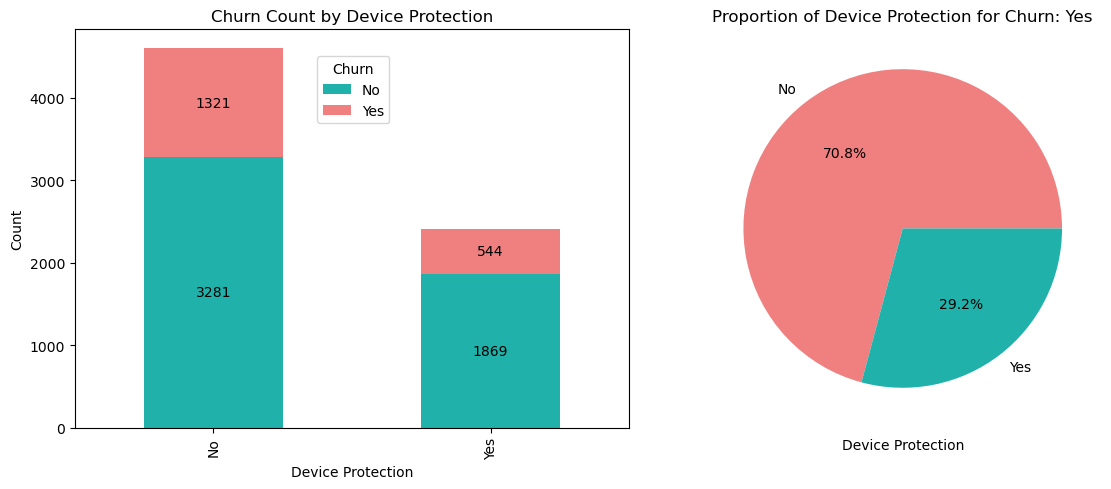

In [20]:
column = 'DeviceProtection'
alias = 'Device Protection'
plot_data = {alias: data[column].map({0: 'No', 1: 'Yes'}),
             'Churn': data['Churn'].map({0: 'No', 1: 'Yes'})}
plot_df = pd.DataFrame(plot_data)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Stacked Bar Graph
ct = pd.crosstab(plot_df[alias], plot_df['Churn'])
ax = ct.plot(kind='bar', stacked=True, color=['lightseagreen', 'lightcoral'], ax=axes[0])
ax.set_title('Churn Count by ' + alias)
ax.set_xlabel(alias)
ax.set_ylabel('Count')
ax.legend(title='Churn', loc='upper right', bbox_to_anchor=(0.58, 0.95))
# Add counts inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontsize=10, color='black')

# Pie Chart
churn_1_data = plot_df[plot_df['Churn'] == 'Yes']
churn_1_data[alias].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightseagreen'], ax=axes[1])
axes[1].set_title('Proportion of ' +alias+ ' for Churn: Yes')
axes[1].set_xlabel(alias)
axes[1].set_ylabel('')

# Plotting
plt.tight_layout()
plt.show()

#### More than half of the customers do not have device protection and such customers are more likely to churn.

# Chrun distribution by TechSupport

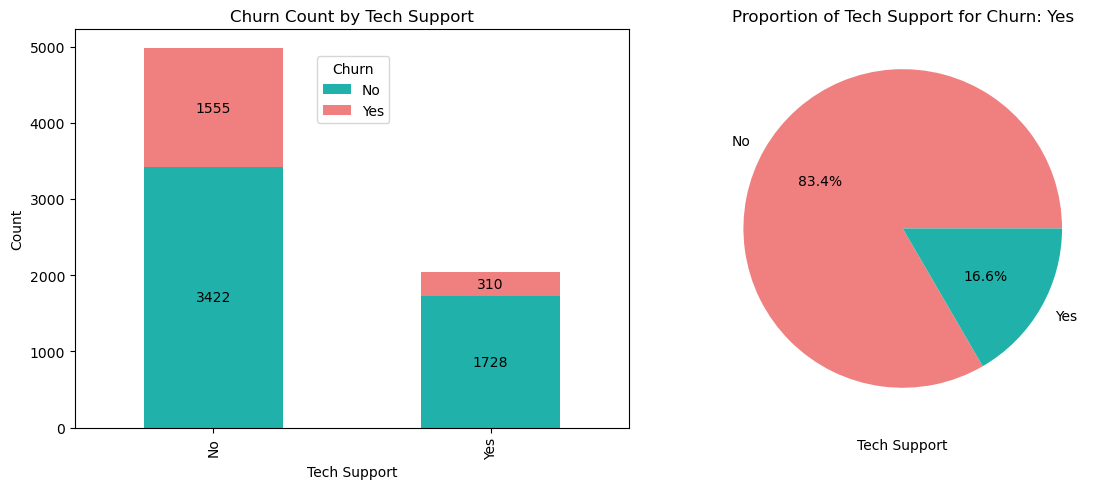

In [21]:
column = 'TechSupport'
alias = 'Tech Support'
plot_data = {alias: data[column].map({0: 'No', 1: 'Yes'}),
             'Churn': data['Churn'].map({0: 'No', 1: 'Yes'})}
plot_df = pd.DataFrame(plot_data)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Stacked Bar Graph
ct = pd.crosstab(plot_df[alias], plot_df['Churn'])
ax = ct.plot(kind='bar', stacked=True, color=['lightseagreen', 'lightcoral'], ax=axes[0])
ax.set_title('Churn Count by ' + alias)
ax.set_xlabel(alias)
ax.set_ylabel('Count')
ax.legend(title='Churn', loc='upper right', bbox_to_anchor=(0.58, 0.95))
# Add counts inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontsize=10, color='black')

# Pie Chart
churn_1_data = plot_df[plot_df['Churn'] == 'Yes']
churn_1_data[alias].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightseagreen'], ax=axes[1])
axes[1].set_title('Proportion of ' +alias+ ' for Churn: Yes')
axes[1].set_xlabel(alias)
axes[1].set_ylabel('')

# Plotting
plt.tight_layout()
plt.show()

#### Approximately 5 out of 7 customers do not opted for tech support. These customer are more likely to churn.

# Chrun distribution by StreamingTV

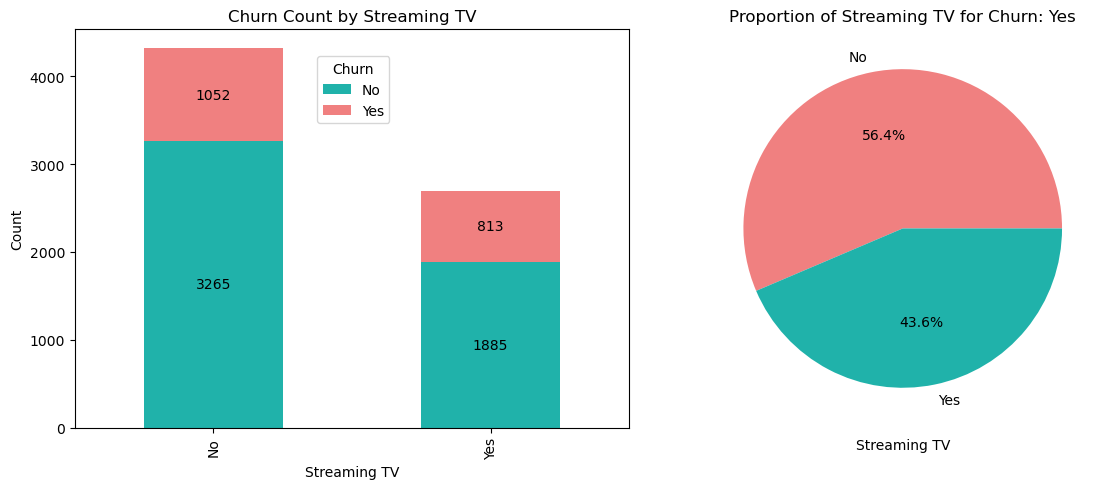

In [22]:
column = 'StreamingTV'
alias = 'Streaming TV'
plot_data = {alias: data[column].map({0: 'No', 1: 'Yes'}),
             'Churn': data['Churn'].map({0: 'No', 1: 'Yes'})}
plot_df = pd.DataFrame(plot_data)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Stacked Bar Graph
ct = pd.crosstab(plot_df[alias], plot_df['Churn'])
ax = ct.plot(kind='bar', stacked=True, color=['lightseagreen', 'lightcoral'], ax=axes[0])
ax.set_title('Churn Count by ' + alias)
ax.set_xlabel(alias)
ax.set_ylabel('Count')
ax.legend(title='Churn', loc='upper right', bbox_to_anchor=(0.58, 0.95))
# Add counts inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontsize=10, color='black')

# Pie Chart
churn_1_data = plot_df[plot_df['Churn'] == 'Yes']
churn_1_data[alias].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightseagreen'], ax=axes[1])
axes[1].set_title('Proportion of ' +alias+ ' for Churn: Yes')
axes[1].set_xlabel(alias)
axes[1].set_ylabel('')

# Plotting
plt.tight_layout()
plt.show()

#### More than half of the customers (exactly 61.5%) do not have Streaming TV service and such customers are more slightly more likely to churn compared to rest of the customers. 

# Chrun distribution by StreamingMovies

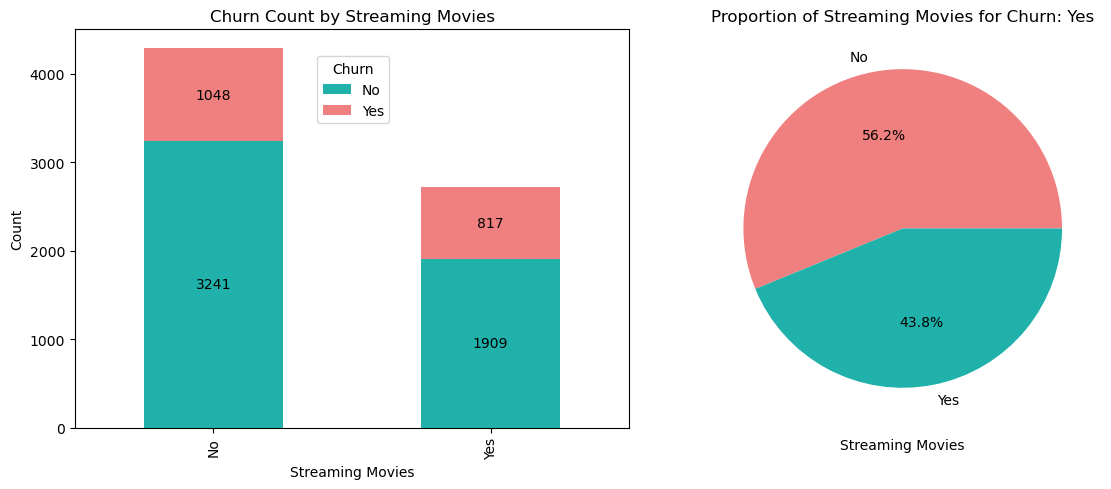

In [23]:
column = 'StreamingMovies'
alias = 'Streaming Movies'
plot_data = {alias: data[column].map({0: 'No', 1: 'Yes'}),
             'Churn': data['Churn'].map({0: 'No', 1: 'Yes'})}
plot_df = pd.DataFrame(plot_data)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Stacked Bar Graph
ct = pd.crosstab(plot_df[alias], plot_df['Churn'])
ax = ct.plot(kind='bar', stacked=True, color=['lightseagreen', 'lightcoral'], ax=axes[0])
ax.set_title('Churn Count by ' + alias)
ax.set_xlabel(alias)
ax.set_ylabel('Count')
ax.legend(title='Churn', loc='upper right', bbox_to_anchor=(0.58, 0.95))
# Add counts inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontsize=10, color='black')

# Pie Chart
churn_1_data = plot_df[plot_df['Churn'] == 'Yes']
churn_1_data[alias].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightseagreen'], ax=axes[1])
axes[1].set_title('Proportion of ' +alias+ ' for Churn: Yes')
axes[1].set_xlabel(alias)
axes[1].set_ylabel('')

# Plotting
plt.tight_layout()
plt.show()

#### For Streaming Movies, same trend can be observed as that of streaming TV where more than half (exactly 61.1%) customers do not have Streaming Movies and are slightly more likely to churn.

## **Customer Service Subscription Insights**

Our examination of customer service subscriptions found some substantial differences among different service offerings. Notably, the following tendencies may be identified:

1. **Dependency on Phone Service:** It should be noted that clients without phone service are unable to have several lines. Phone services are used by about 90.3% of our consumers, and they have a higher turnover rate. This discovery may point to the necessity for more investigation into the causes of this unanticipated trend.

2. **Fibre Optic Internet and Churn:** Customers who have chosen fiber optic as their internet service provider are more likely to churn. This can be attributable to a variety of variables, including prospective price increases, greater competition, customer service quality, and other underlying causes. Notably, fiber optic connection is substantially more expensive than DSL, which may contribute to customer turnover.

3. **Reduced Turnover Services:** Customers that have subscribed to extra services such as OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport, on the other hand, are less likely to churn. These services appear to play an important role in client retention, stressing their importance in customer retention tactics.

4. **Neutrality of Streaming Services**: Surprisingly, the availability of streaming service subscribers does not appear to predict attrition. This service is evenly distributed among consumers that select both "yes" and "no" choices, indicating that it is not a big churn factor.



# Chrun distribution by PaperlessBilling

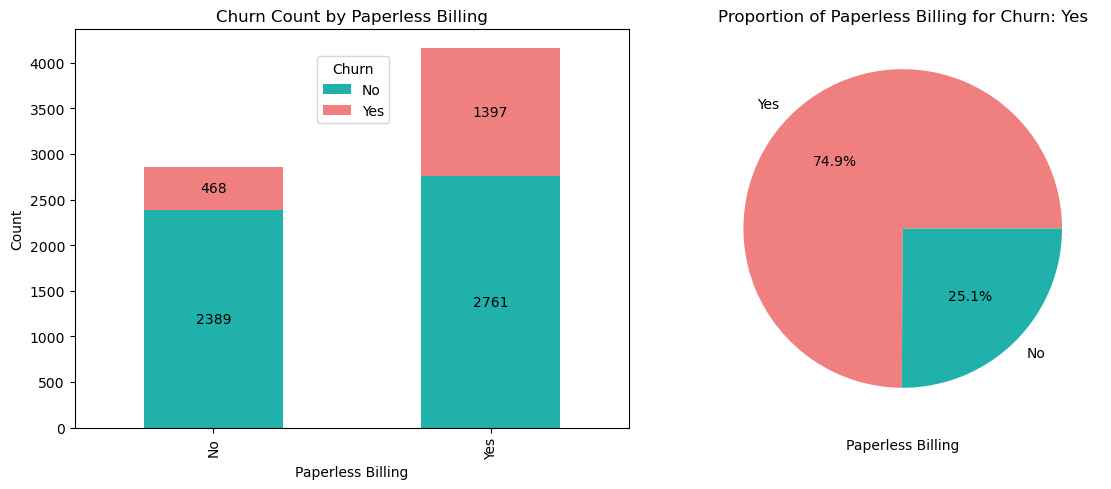

In [24]:
column = 'PaperlessBilling'
alias = 'Paperless Billing'
plot_data = {alias: data[column].map({0: 'No', 1: 'Yes'}),
             'Churn': data['Churn'].map({0: 'No', 1: 'Yes'})}
plot_df = pd.DataFrame(plot_data)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Stacked Bar Graph
ct = pd.crosstab(plot_df[alias], plot_df['Churn'])
ax = ct.plot(kind='bar', stacked=True, color=['lightseagreen', 'lightcoral'], ax=axes[0])
ax.set_title('Churn Count by ' + alias)
ax.set_xlabel(alias)
ax.set_ylabel('Count')
ax.legend(title='Churn', loc='upper right', bbox_to_anchor=(0.58, 0.95))
# Add counts inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontsize=10, color='black')

# Pie Chart
churn_1_data = plot_df[plot_df['Churn'] == 'Yes']
churn_1_data[alias].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightseagreen'], ax=axes[1])
axes[1].set_title('Proportion of ' +alias+ ' for Churn: Yes')
axes[1].set_xlabel(alias)
axes[1].set_ylabel('')

# Plotting
plt.tight_layout()
plt.show()

#### Nearly 6 out of 10 customers have gone for paperless billing. These customers are more likely to churn.

# Churn distribution by Internet Services

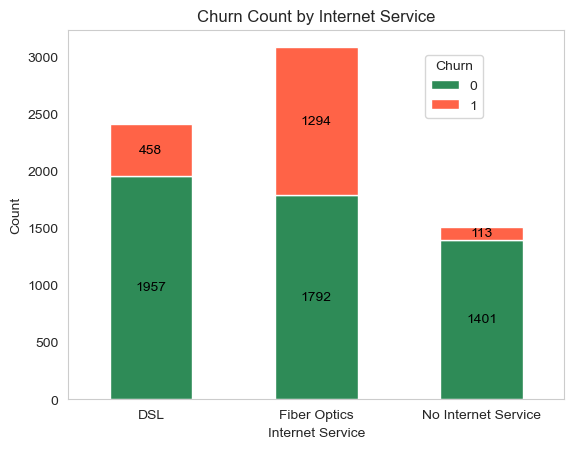

In [61]:
# Combine the columns into a single column
plot_data['InternetService'] = data[['IntrntSrvc_DSL', 'IntrntSrvc_FiberOptic', 'IntrntSrvc_No']].idxmax(axis=1)

# Create a crosstab for the combined column
ct_combined = pd.crosstab(plot_data['InternetService'], data['Churn'])

# Create a bar plot for all categories
ax = ct_combined.plot(kind='bar', stacked=True, color=['seagreen', 'tomato'])
plt.title('Churn Count by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right', bbox_to_anchor=(0.85, 0.95))
ax.set_xticklabels(['DSL', 'Fiber Optics', 'No Internet Service'])
# Add counts inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontsize=10, color='black')
ax.grid(visible=False)
plt.show()

#### It seems that customer who have Fiber Optics churned the most compared to people with DSL. However, people with no internet service are very less likely to churn.

# Churn Distribution by Contract

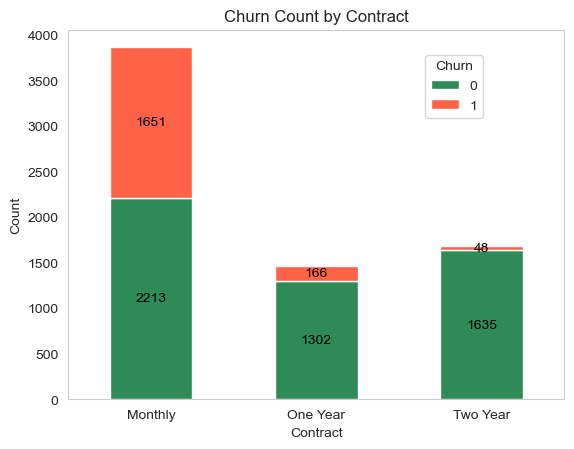

In [96]:
# Combine the columns into a single column
plot_data['Contract'] = data[['Contract_Monthly', 'Contract_OneYear', 'Contract_TwoYear']].idxmax(axis=1)

# Create a crosstab for the combined column
ct_combined = pd.crosstab(plot_data['Contract'], data['Churn'])

# Create a bar plot for all categories
ax = ct_combined.plot(kind='bar', stacked=True, color=['seagreen', 'tomato'])
plt.title('Churn Count by Contract')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right', bbox_to_anchor=(0.85, 0.95))
ax.set_xticklabels(['Monthly', 'One Year', 'Two Year'])
# Add counts inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontsize=10, color='black')
ax.grid(visible=False)
plt.show()

#### Customers prefer short term contract (monthly contract) compared to longer term contracts (one year and two year contracts). These short term customers are majorly contributing towards the churn. Customers with longer contract with the company are very less likely to churn.

# Churn Distribution by Payment Method

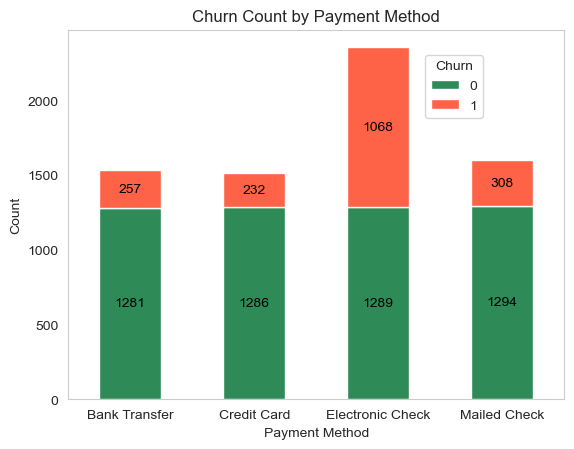

In [88]:
# Combine the columns into a single column
plot_data['Payment Method'] = data[['PayMthd_BankTransfer', 'PayMthd_CreditCard', 'PayMthd_ElectronicCheck', 'PayMthd_MailedCheck']].idxmax(axis=1)

# Create a crosstab for the combined column
ct_combined = pd.crosstab(plot_data['Payment Method'], data['Churn'])

# Create a bar plot for all categories
ax = ct_combined.plot(kind='bar', stacked=True, color=['seagreen', 'tomato'])
plt.title('Churn Count by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right', bbox_to_anchor=(0.85, 0.95))
ax.set_xticklabels(['Bank Transfer', 'Credit Card', 'Electronic Check', 'Mailed Check'])
# Add counts inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontsize=10, color='black')
ax.grid(visible=False)    
plt.show()

#### Customers who are paying through the Electronic check are more likely to churn compared to rest of the payment methods.

**Insights into Payments** 
1. **Contract Length and Churn:** The negative association between contract length and turnover rate is one intriguing finding. Customers that have shorter contract terms are more likely to leave. Those with longer-term obligations, on the other hand, face extra obstacles when seeking to cancel early. This research emphasizes the need of developing long-term client connections in order to lower churn rates, since such ties appear to be more robust.

2. **The Impact of Paperless Billing:** It's worth noting that clients that choose paperless billing have a greater turnover rate. Paperless billing has been implemented by about 59.2% of our clients. The reasons for this correlation need further examination since it gives insight into consumer billing preferences and habits.

3. **Electronic Checks and Churn**: Customers who pay with electronic checks are more likely to churn, according to one fascinating result. This payment type is popular among our clients. Understanding the causes behind this correlation might be critical in devising ways to decrease attrition among electronic check consumers.


# Churn Amount VS Tenure

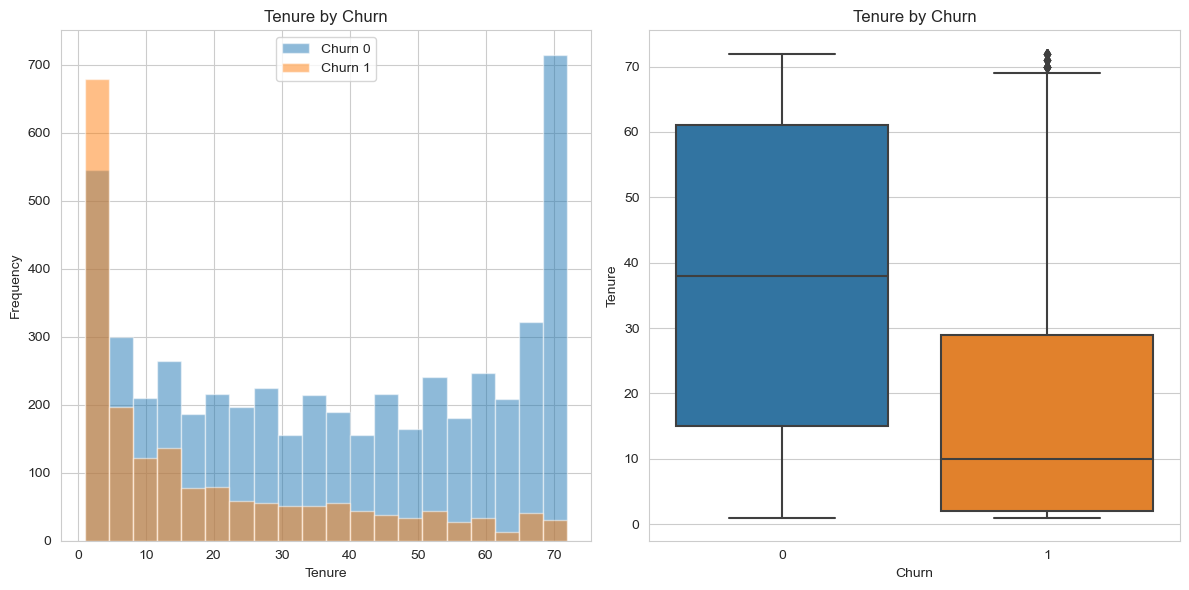

In [84]:
# Separate data for each churn category
churn_0 = data[data['Churn'] == 0]['tenure']
churn_1 = data[data['Churn'] == 1]['tenure']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histogram
axs[0].hist(churn_0, bins=20, alpha=0.5, label='Churn 0')#, color='seagreen')
axs[0].hist(churn_1, bins=20, alpha=0.5, label='Churn 1')#, color='tomato')
axs[0].set_title('Tenure by Churn')
axs[0].set_xlabel('Tenure')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# Box plot
sns.boxplot(x='Churn', y='tenure', data=data, ax=axs[1])#, palette=['seagreen', 'tomato']
axs[1].set_title('Tenure by Churn')
axs[1].set_xlabel('Churn')
axs[1].set_ylabel('Tenure')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### It is evident from the graphs that once people stay more than around 20 years then they are less likely to churn based on the tenure of the customers compared to their churn rate.

# Churn Amount VS MonthlyCharges

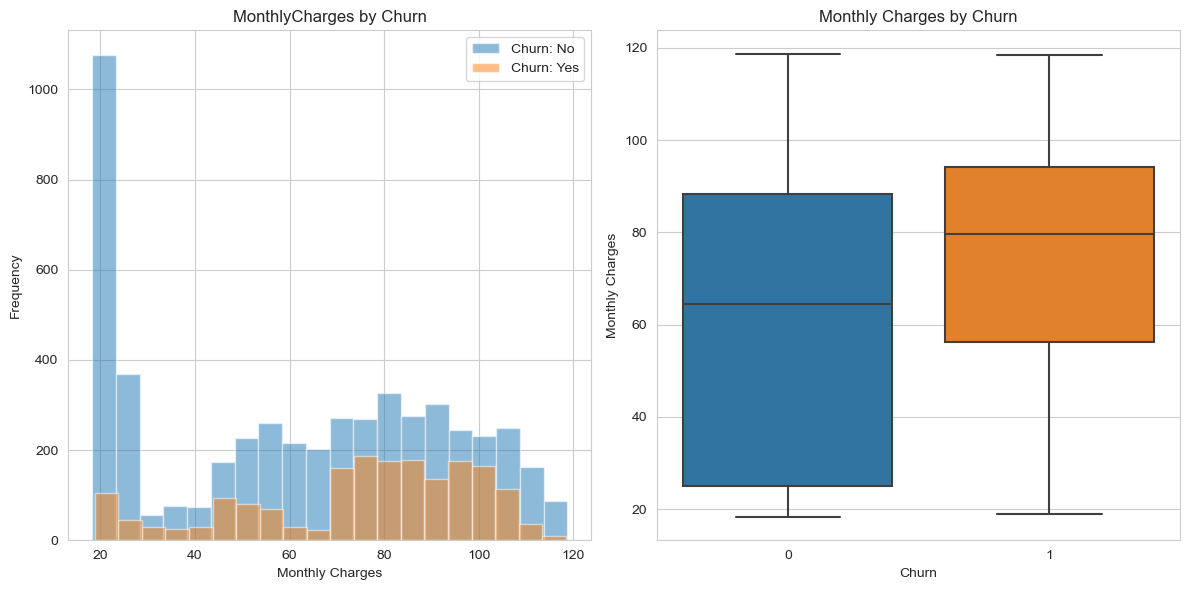

In [83]:
# Separate data for each churn category
churn_0 = data[data['Churn'] == 0]['MonthlyCharges']
churn_1 = data[data['Churn'] == 1]['MonthlyCharges']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histogram
axs[0].hist(churn_0, bins=20, alpha=0.5, label='Churn: No')#, color='seagreen')
axs[0].hist(churn_1, bins=20, alpha=0.5, label='Churn: Yes')#, color='tomato')
axs[0].set_title('Monthly Charges by Churn')
axs[0].set_xlabel('Monthly Charges')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# Box plot
sns.boxplot(x='Churn', y='MonthlyCharges', data=data, ax=axs[1])#, palette=['seagreen', 'tomato']
axs[1].set_title('Monthly Charges by Churn')
axs[1].set_xlabel('Churn')
axs[1].set_ylabel('Monthly Charges')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Monthly charges is directly proportional to the churn rate that means that lower the montly charges paid by the customer then that customer is less likely to churn.

# Churn Amount VS TotalCharges

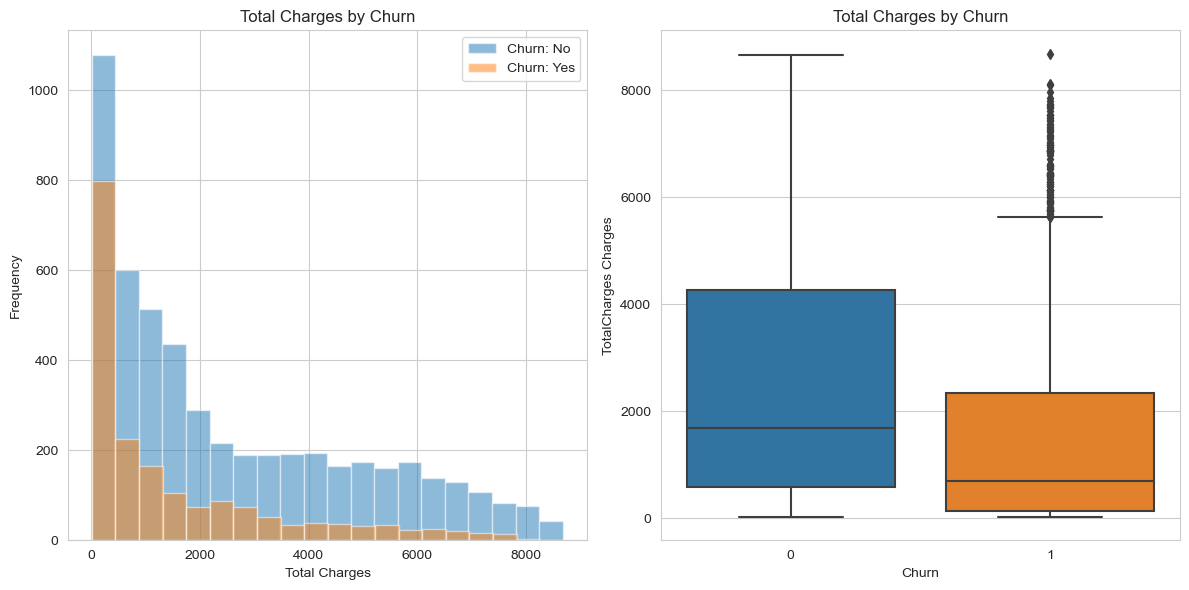

In [86]:
# Separate data for each churn category
churn_0 = data[data['Churn'] == 0]['TotalCharges']
churn_1 = data[data['Churn'] == 1]['TotalCharges']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histogram
axs[0].hist(churn_0, bins=20, alpha=0.5, label='Churn: No')#, color='seagreen')
axs[0].hist(churn_1, bins=20, alpha=0.5, label='Churn: Yes')#, color='tomato')
axs[0].set_title('Total Charges by Churn')
axs[0].set_xlabel('Total Charges')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# Box plot
sns.boxplot(x='Churn', y='TotalCharges', data=data, ax=axs[1])#, palette=['seagreen', 'tomato']
axs[1].set_title('Total Charges by Churn')
axs[1].set_xlabel('Churn')
axs[1].set_ylabel('TotalCharges Charges')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Churn rate is inversely proportional to the total charges paid by the customer that is higher the total charges paid by the customer lower are the chances of their churning.

**Insights into Customer Account Information** 

1. **Tenure Distribution:** The customer tenure histogram shows a right-skewed distribution, indicating that the bulk of consumers have only been with the telecom business for the first few months (0-9 months). This realization emphasizes the significance of efficiently maintaining consumers throughout their first few months of involvement.

2. **Churn Timing**: Surprisingly, the biggest percentage of churn happens within the first few months (0-9 months). This discovery underscores the important period during which customer retention efforts should be concentrated in order to effectively minimize churn rates.

3. **Early Churn Concentration**: One significant conclusion is that around 75% of consumers who eventually quit the Telco firm do so during the first 30 months of their employment. This statistic emphasizes the importance of early client interaction and satisfaction in developing long-term connections.

4. **Monthly Fees and Churn:** Our examination of the monthly charge histogram indicates an interesting pattern. Customers who pay greater monthly fees are more likely to leave. This implies that discounts, promotions, or competitive pricing might be effective motivators for customers to stay loyal. Pricing methods that take these findings into account may be beneficial in keeping consumers.
